QUESTION NUMBER 10 PAGE 65 OF THE TEXTBOOK "AN INTRODUCTION TO STATISTICAL LEARNING WITH APPLICATIONS IN PYTHON".

QUESTION A

To begin, load in the Boston data set, which is part of the ISLP
library.

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town (The dataset I have downloaded does not contain this)
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

In [1]:
#Importing libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Reading the csv file
boston = pd.read_csv("Boston.csv", index_col = 0)

In [2]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


QUESTION B

How many rows are in this data set? How many columns? What
do the rows and columns represent?

In [3]:
print("The number of rows in the Boston dataset is " + str(boston.shape[0]) + "\n" +
"The number of columns in the Boston dataset is " + str(boston.shape[1]) + "\n" +
"The rows represent the number of data points" + "\n" + 
"The columns represent the number of data features or variables")

The number of rows in the Boston dataset is 506
The number of columns in the Boston dataset is 13
The rows represent the number of data points
The columns represent the number of data features or variables


In [ ]:
QUESTION C

Make some pairwise scatterplots of the predictors (columns) in
this data set. Describe your findings.

In [4]:
import statsmodels.api as sm

X = boston.drop('medv', axis=1)
y = boston['medv']
X = sm.add_constant(X)  # Adds intercept

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 21 Sep 2025   Prob (F-statistic):          2.23e-133
Time:                        20:55:40   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.0

<Axes: >

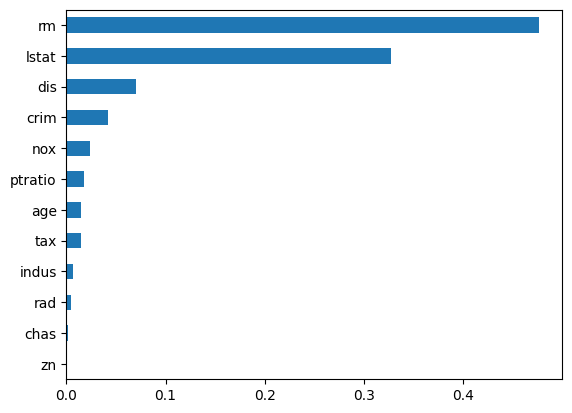

In [5]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X.drop('const', axis=1), y)

importances = pd.Series(rf.feature_importances_, index=X.columns[1:])
importances.sort_values().plot(kind='barh')

In [6]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

rfe = RFE(LinearRegression(), n_features_to_select=5)
rfe.fit(X.drop('const', axis=1), y)

selected = X.columns[1:][rfe.support_]
print("Top features:", selected)

Top features: Index(['chas', 'nox', 'rm', 'dis', 'ptratio'], dtype='object')


based on 3 measures, 8 features were selected: crim, chas, nox, rm, dis, tax, ptratio, lstat

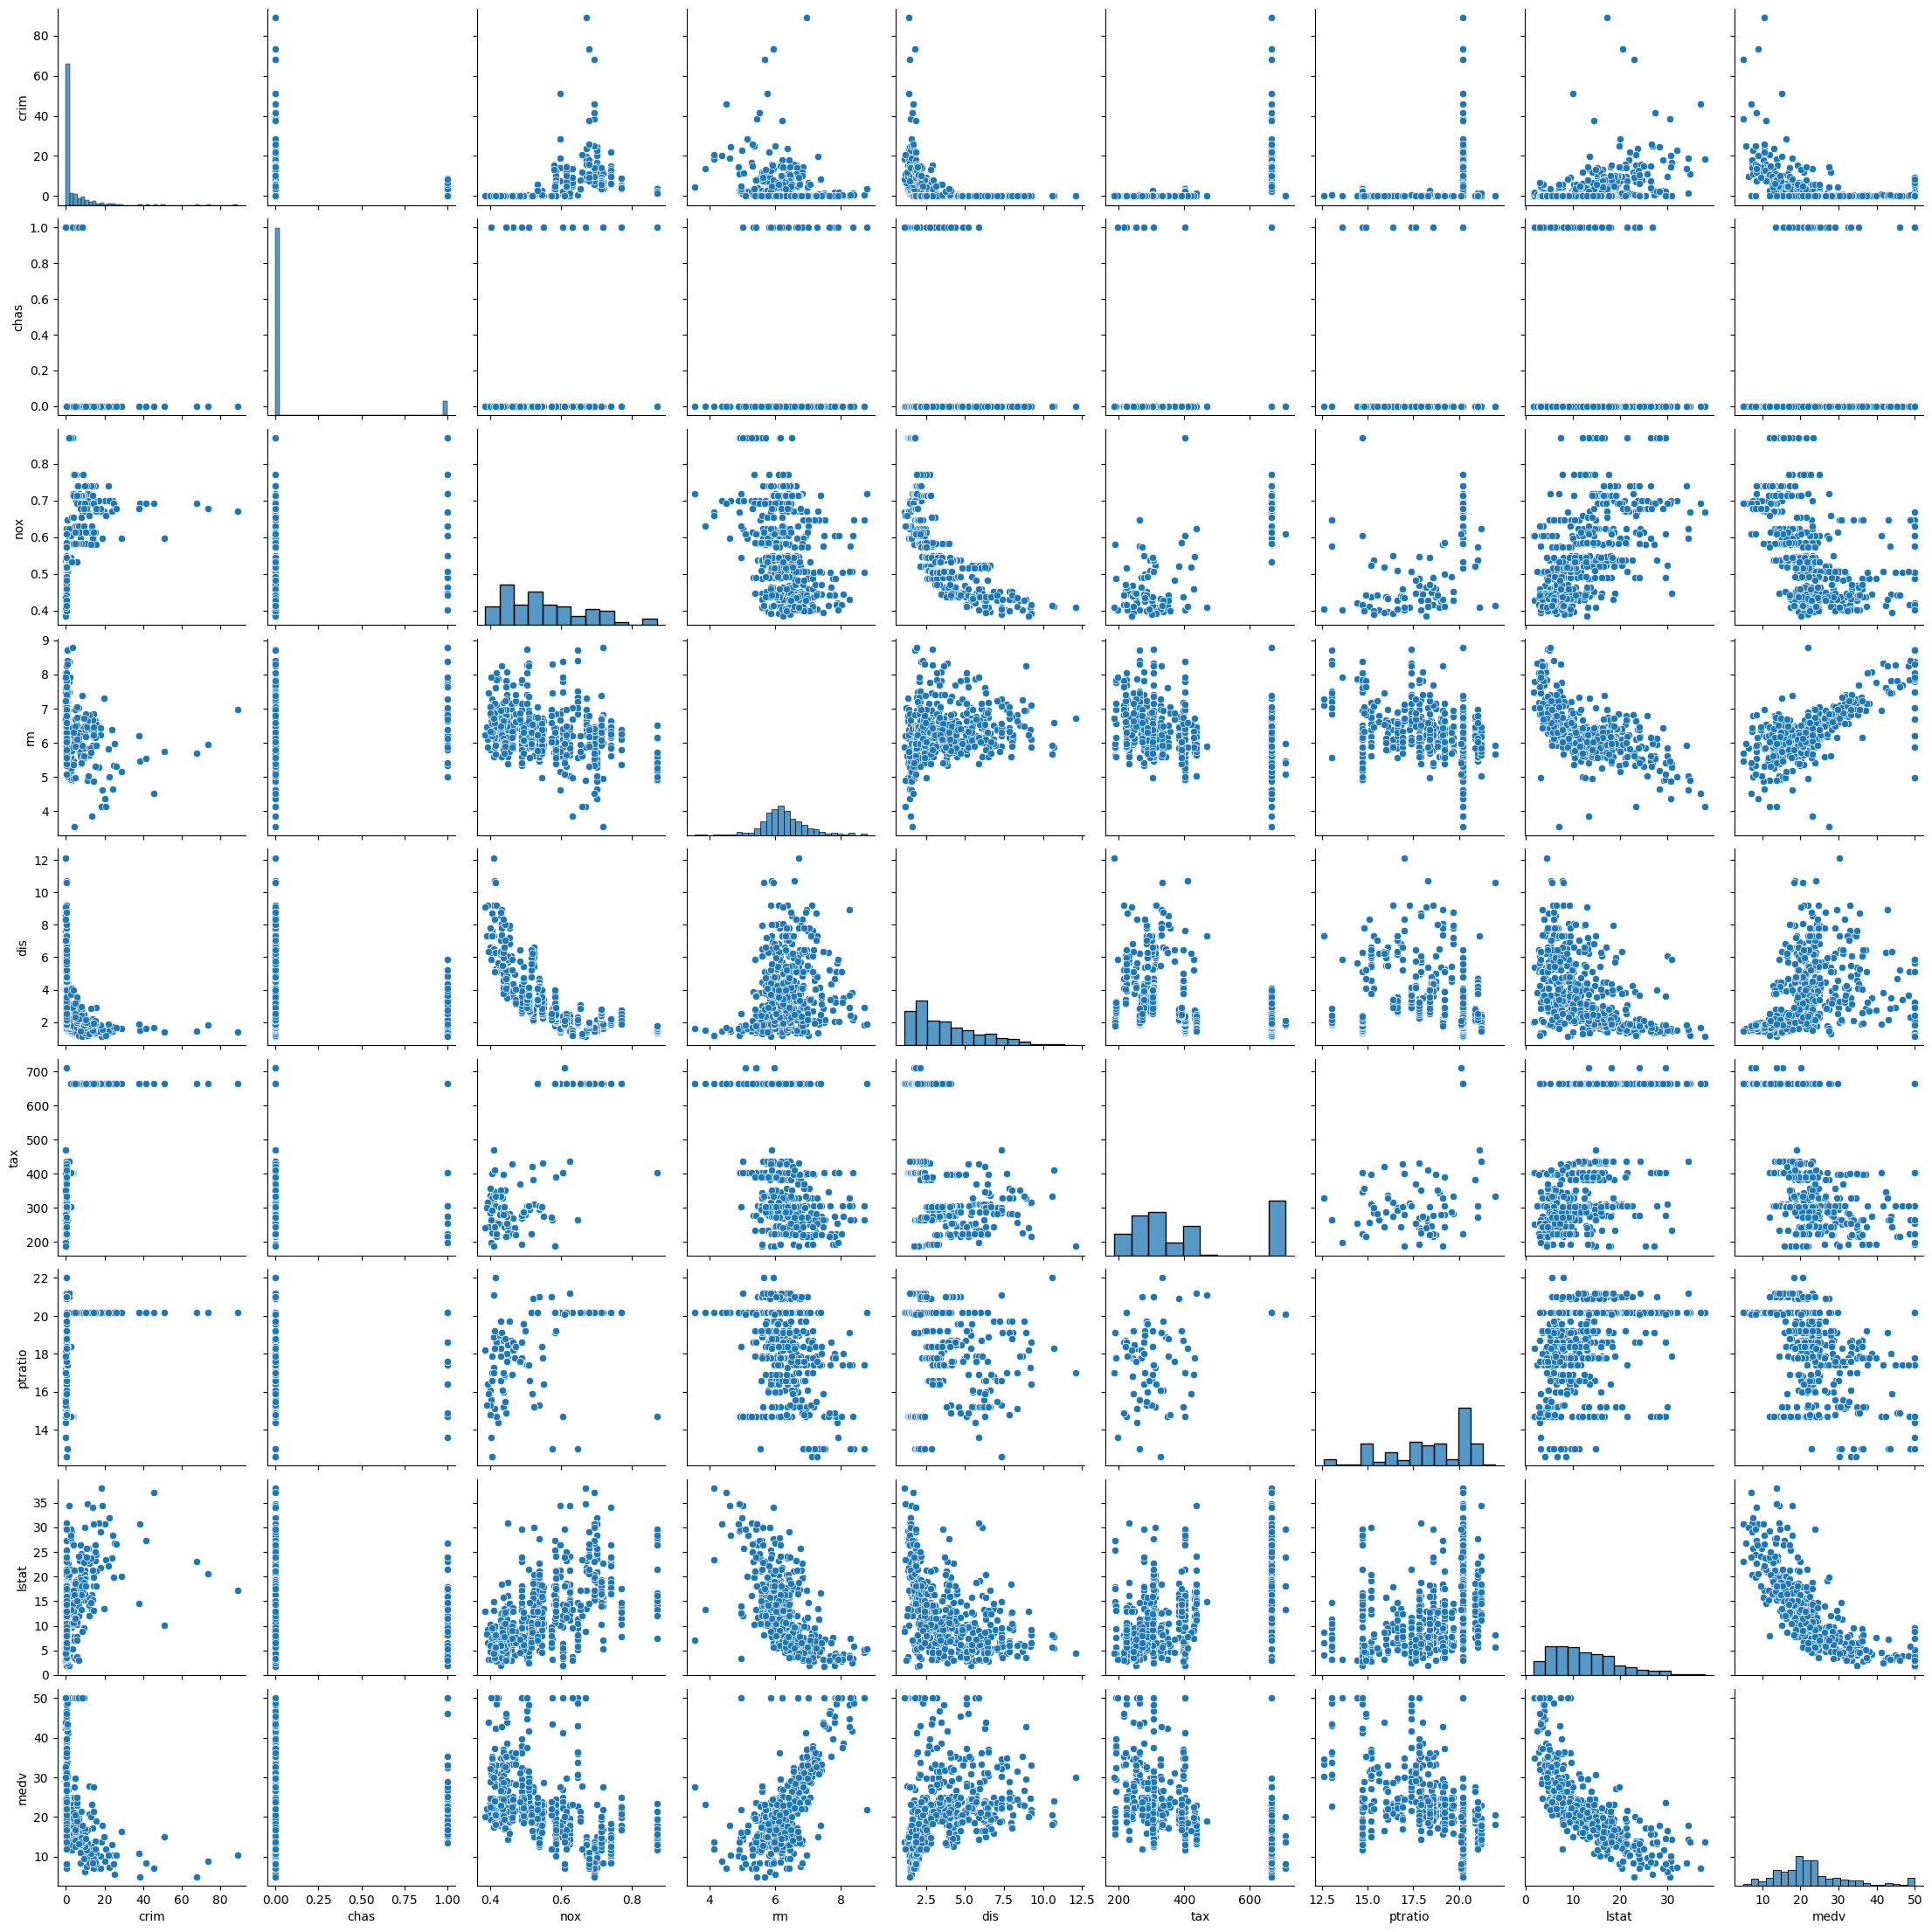

In [7]:
import seaborn as sns
sns.pairplot(boston[['crim', 'chas', 'nox', 'rm', 'dis', 'tax', 'ptratio', 'lstat', 'medv']])

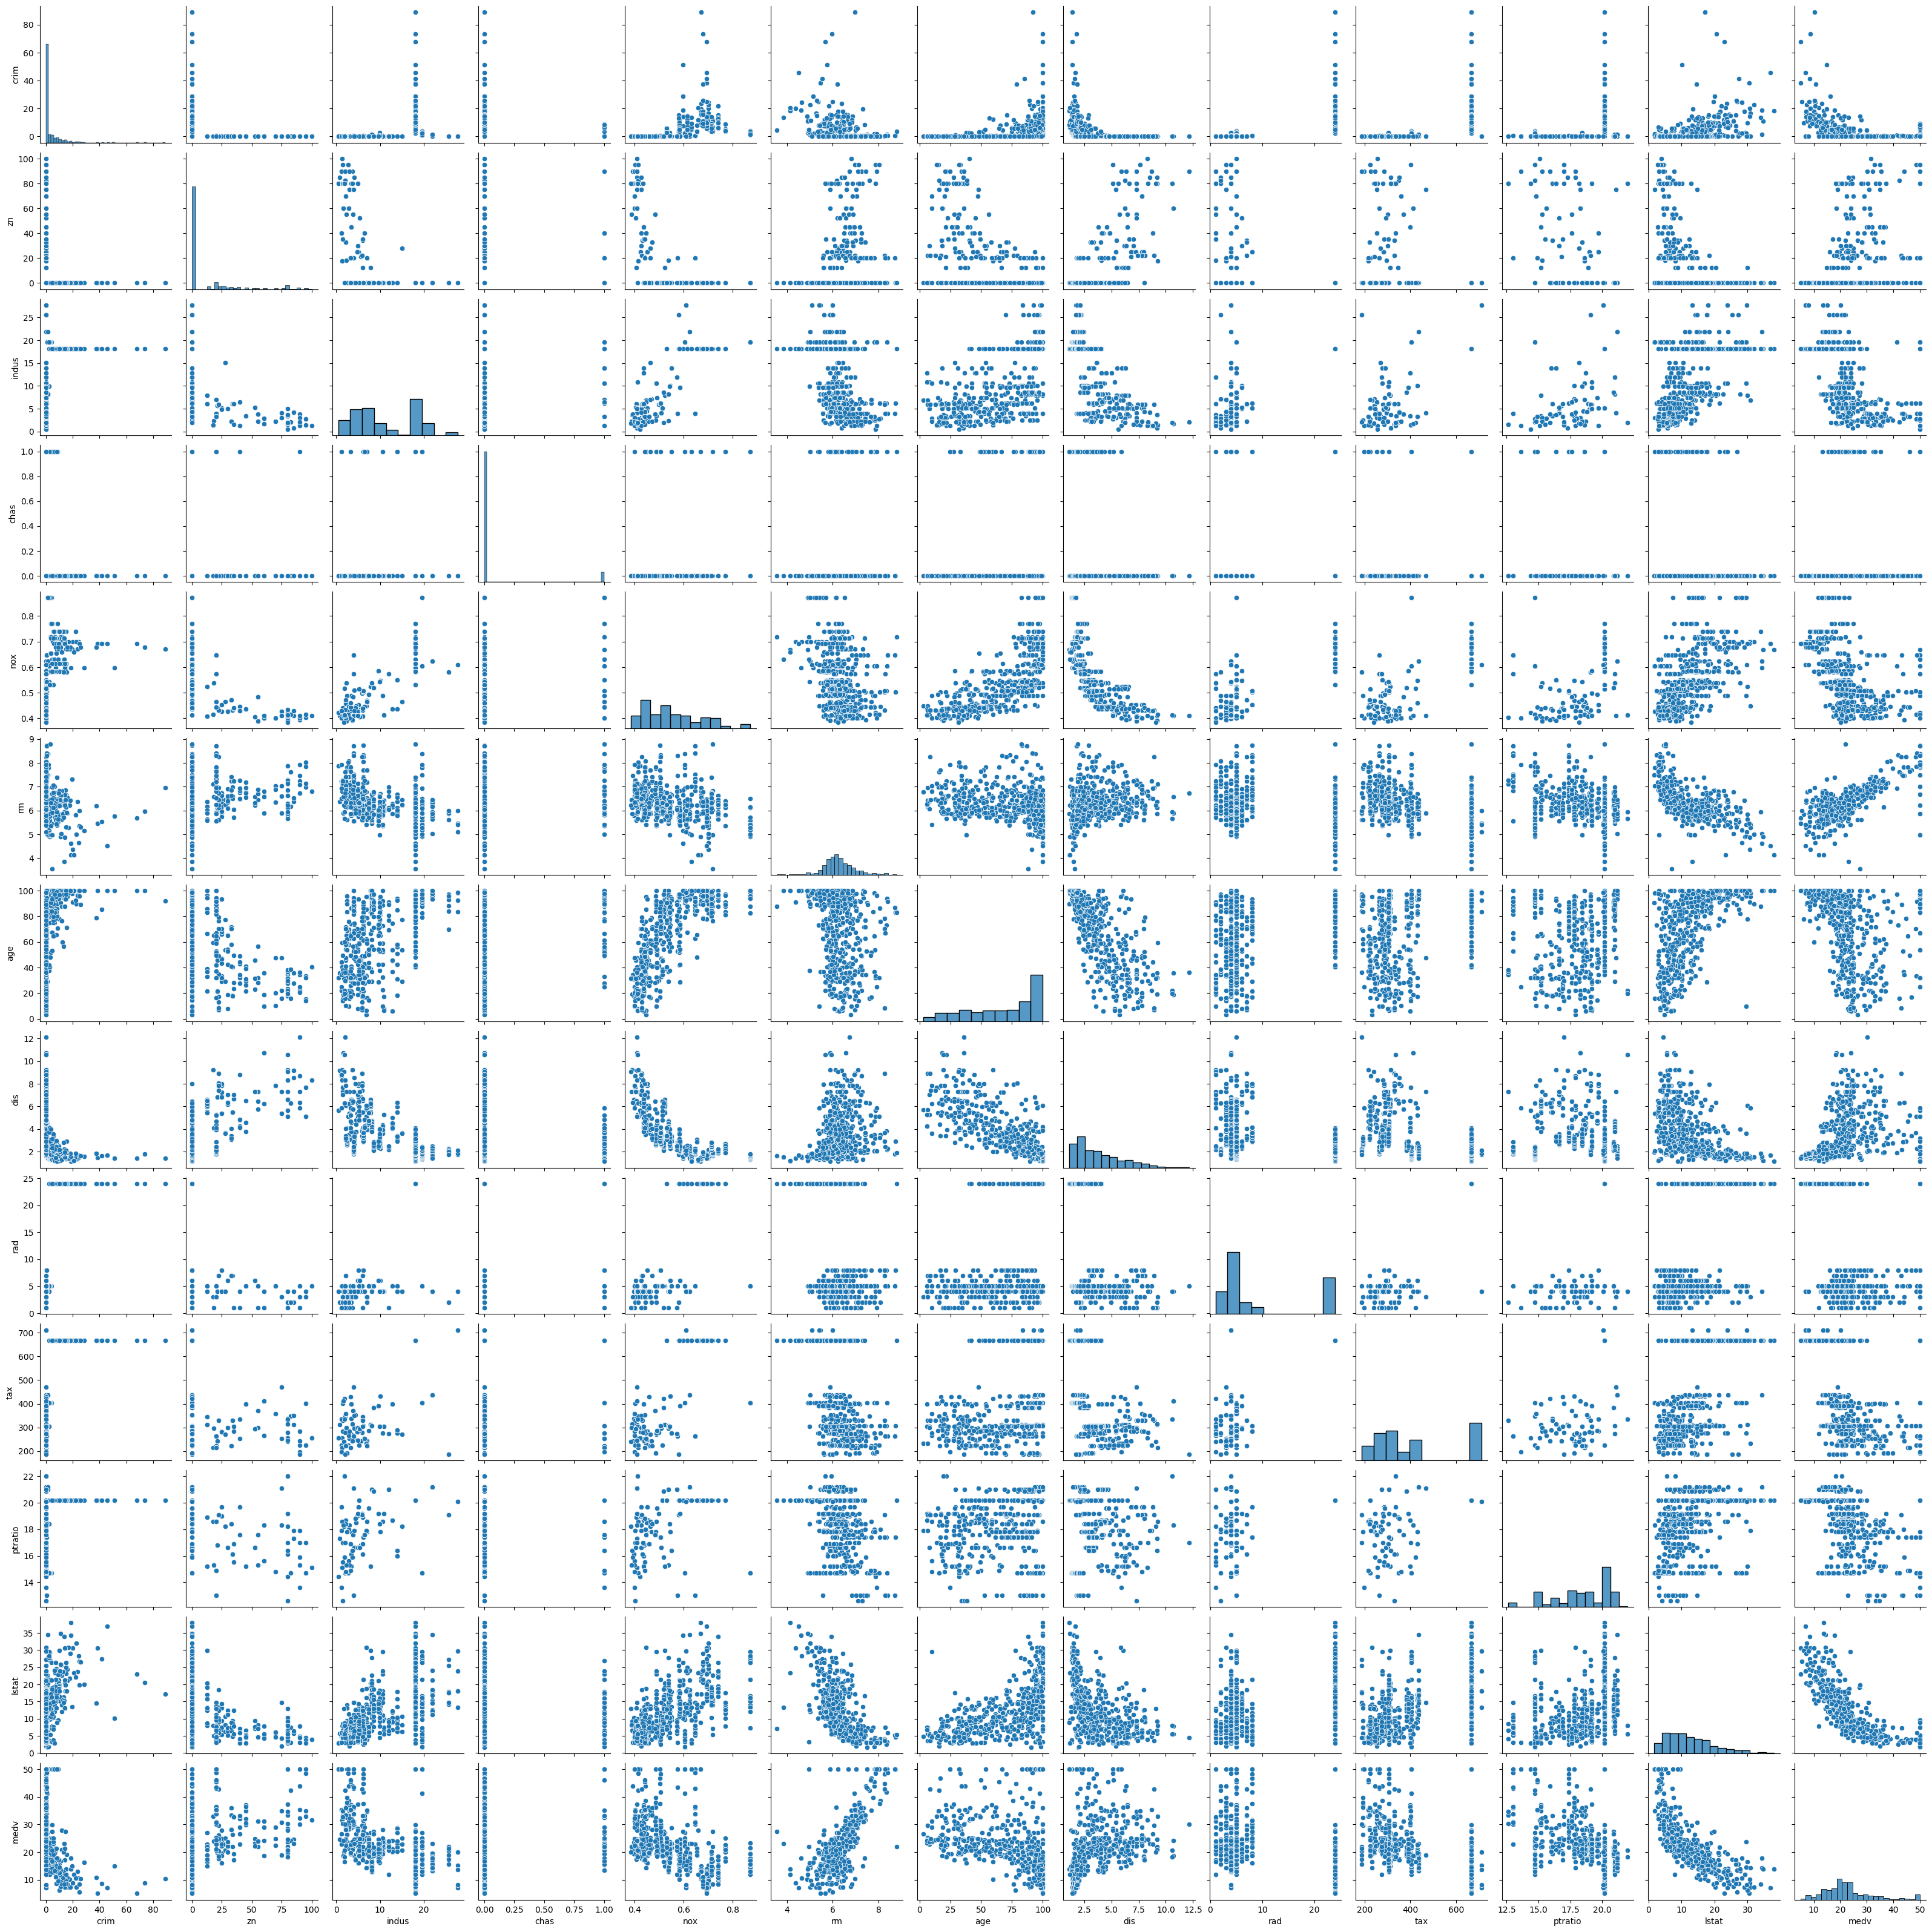

In [8]:
import seaborn as sns
sns.pairplot(boston)

certain levels of industrial area are correlated with crime rate (probably within normal/most common level for people to live)
certain levels of nitric oxide concentration are correlated with crime rate (probably within normal/most common level for people to live)
certain levels of average numbers of rooms per dwelling are correlated with crime rate (probably within normal/most common level for people to live)
older dwelling structure is positively correlated with crime rate
proximity to job/work area is negatively correlated with crime rate
lower status population percentage is positively correlated with crime rate
value of homes is negatively correlated with crime rate

QUESTION D

Are any of the predictors associated with per capita crime rate?
If so, explain the relationship.

older dwelling structure is positively correlated with crime rate
proximity to job/work area is negatively correlated with crime rate
lower status population percentage is positively correlated with crime rate
value of homes is negatively correlated with crime rate

QUESTION E

Do any of the suburbs of Boston appear to have particularly
high crime rates? Tax rates? Pupil-teacher ratios? Comment on
the range of each predictor.

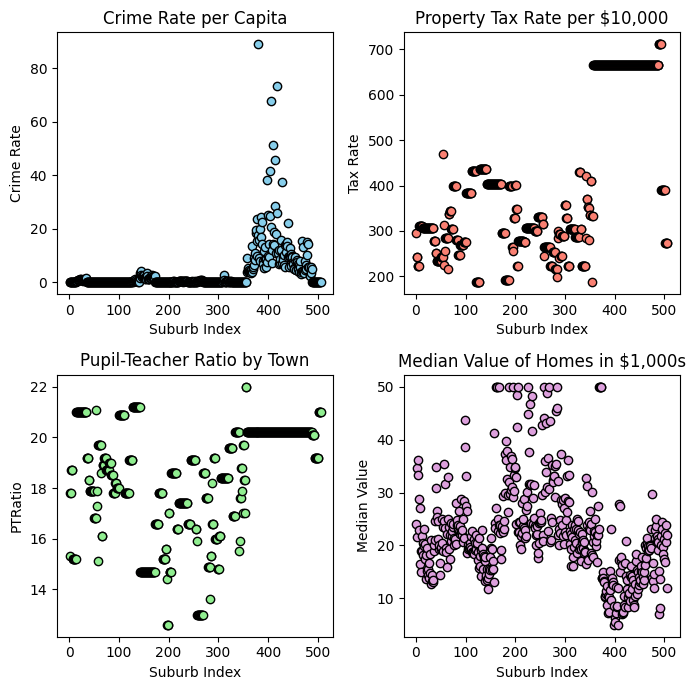

In [9]:
import math

# Select four quantitative variables
variables = ['crim', 'tax', 'ptratio', 'medv']

#Using Sturges' rule to decide optimal number of classes or bins
v1bin = math.ceil(1 + 3.3 * math.log10(boston[variables[0]].count()))
v2bin = math.ceil(1 + 3.3 * math.log10(boston[variables[1]].count()))
v3bin = math.ceil(1 + 3.3 * math.log10(boston[variables[2]].count()))
v4bin = math.ceil(1 + 3.3 * math.log10(boston[variables[3]].count()))

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(7, 7))  # 2 rows × 2 columns

# Scatter plots: X = feature value, Y = index
axes[0, 0].scatter(boston.index, boston[variables[0]], color='skyblue', edgecolors='black')
axes[0, 0].set_title('Crime Rate per Capita')
axes[0, 0].set_xlabel('Suburb Index')
axes[0, 0].set_ylabel('Crime Rate')

axes[0, 1].scatter(boston.index, boston[variables[1]], color='salmon', edgecolors='black')
axes[0, 1].set_title('Property Tax Rate per $10,000')
axes[0, 1].set_xlabel('Suburb Index')
axes[0, 1].set_ylabel('Tax Rate')

axes[1, 0].scatter(boston.index, boston[variables[2]], color='lightgreen', edgecolors='black')
axes[1, 0].set_title('Pupil-Teacher Ratio by Town')
axes[1, 0].set_xlabel('Suburb Index')
axes[1, 0].set_ylabel('PTRatio')

axes[1, 1].scatter(boston.index, boston[variables[3]], color='plum', edgecolors='black')
axes[1, 1].set_title('Median Value of Homes in $1,000s')
axes[1, 1].set_xlabel('Suburb Index')
axes[1, 1].set_ylabel('Median Value')

plt.tight_layout()
plt.show()

In [10]:
boston[['crim','tax', 'ptratio']].describe()

,crim,tax,ptratio
count,506.000000,506.000000,506.000000
mean,3.613524,408.237154,18.455534
std,8.601545,168.537116,2.164946
min,0.006320,187.000000,12.600000
25%,0.082045,279.000000,17.400000
50%,0.256510,330.000000,19.050000
75%,3.677083,666.000000,20.200000
max,88.976200,711.000000,22.000000


In [11]:
high_crime = boston[boston['crim'] > 20]
print(high_crime[['crim', 'tax', 'ptratio']].sort_values(by = 'crim', ascending = False))

          crim  tax  ptratio
index                       
381    88.9762  666     20.2
419    73.5341  666     20.2
406    67.9208  666     20.2
411    51.1358  666     20.2
415    45.7461  666     20.2
405    41.5292  666     20.2
399    38.3518  666     20.2
428    37.6619  666     20.2
414    28.6558  666     20.2
418    25.9406  666     20.2
401    25.0461  666     20.2
404    24.8017  666     20.2
387    24.3938  666     20.2
379    23.6482  666     20.2
388    22.5971  666     20.2
441    22.0511  666     20.2
407    20.7162  666     20.2
385    20.0849  666     20.2


In [12]:
high_tax = boston[boston['tax'] < 500]
print(high_tax[['crim', 'tax', 'ptratio']].sort_values(by = 'crim', ascending = False))

          crim  tax  ptratio
index                       
144    4.09740  403     14.7
156    3.53501  403     14.7
143    3.32105  403     14.7
166    2.92400  403     14.7
145    2.77974  403     14.7
...        ...  ...      ...
56     0.01311  226     17.9
342    0.01301  284     15.5
286    0.01096  300     15.3
285    0.00906  285     15.3
1      0.00632  296     15.3

[369 rows x 3 columns]


Does it mean the higher the tax of the housing, the more crimes happen in that area? That means higher housing price is prone
to more crimes?

In [13]:
high_ptratio = boston[boston['ptratio'] > 20]
print(high_ptratio[['crim', 'tax', 'ptratio']].sort_values(by = 'crim', ascending = False))

           crim  tax  ptratio
index                        
381    88.97620  666     20.2
419    73.53410  666     20.2
406    67.92080  666     20.2
411    51.13580  666     20.2
415    45.74610  666     20.2
...         ...  ...      ...
335     0.03738  224     20.2
337     0.03427  224     20.2
339     0.03306  224     20.2
338     0.03041  224     20.2
55      0.01360  469     21.1

[201 rows x 3 columns]


QUESTION F

How many of the suburbs in this data set bound the Charles
river?

In [14]:
boston_chas = boston['chas'].value_counts()[1]
print("The number of suburbs bound the charles river is " + str(boston_chas))

The number of suburbs bound the charles river is 35


QUESTION G

What is the median pupil-teacher ratio among the towns in this
data set?

In [15]:
print("The median of pupil-teacher ratio among the towns in this data set is " + str(boston['ptratio'].median()))

The median of pupil-teacher ratio among the towns in this data set is 19.05


QUESTION H

Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors
for that suburb, and how do those values compare to the overall
ranges for those predictors? Comment on your findings.

In [16]:
boston[boston['medv'] == boston['medv'].min()]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
index,,,,,,,,,,,,,
399,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
406,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


The crime rate for this two suburbs with the lowest median value of homes is extremely high, with the high level of industrial zones (75%), high level of nitric oxides, low number of rooms per house (< 25%), old buildings (100% before 1940), high tax, high pupil-teacher ratio, and 17% of the population is of the lower status.

Basically, the suburbs with lowest median value of homes have worse living condition than the average of the suburbs in the dataset.

QUESTION I

In this data set, how many of the suburbs average more than
seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the suburbs that average more than eight rooms
per dwelling.

In [17]:
more_than_7 = boston[boston['rm'] > 7].shape[0]
more_than_8 = boston[boston['rm'] > 8]
print(f"Suburbs with >7 rooms: {more_than_7}")
print(f"Suburbs with >8 rooms: {more_than_8.shape[0]}")
print(more_than_8)

Suburbs with >7 rooms: 64
Suburbs with >8 rooms: 13
          crim    zn  indus  chas     nox     rm   age     dis  rad  tax  \
index                                                                      
98     0.12083   0.0   2.89     0  0.4450  8.069  76.0  3.4952    2  276   
164    1.51902   0.0  19.58     1  0.6050  8.375  93.9  2.1620    5  403   
205    0.02009  95.0   2.68     0  0.4161  8.034  31.9  5.1180    4  224   
225    0.31533   0.0   6.20     0  0.5040  8.266  78.3  2.8944    8  307   
226    0.52693   0.0   6.20     0  0.5040  8.725  83.0  2.8944    8  307   
227    0.38214   0.0   6.20     0  0.5040  8.040  86.5  3.2157    8  307   
233    0.57529   0.0   6.20     0  0.5070  8.337  73.3  3.8384    8  307   
234    0.33147   0.0   6.20     0  0.5070  8.247  70.4  3.6519    8  307   
254    0.36894  22.0   5.86     0  0.4310  8.259   8.4  8.9067    7  330   
258    0.61154  20.0   3.97     0  0.6470  8.704  86.9  1.8010    5  264   
263    0.52014  20.0   3.97     0  0

The suburbs that average more than eight rooms per dwelling have higher median value of homes (> 75%). These are more likely to 
be wealthy neighborhoods with long heritage (due to the 'age' variable being very high) and high-status society ('age' variable is very low).